len(exps)=33


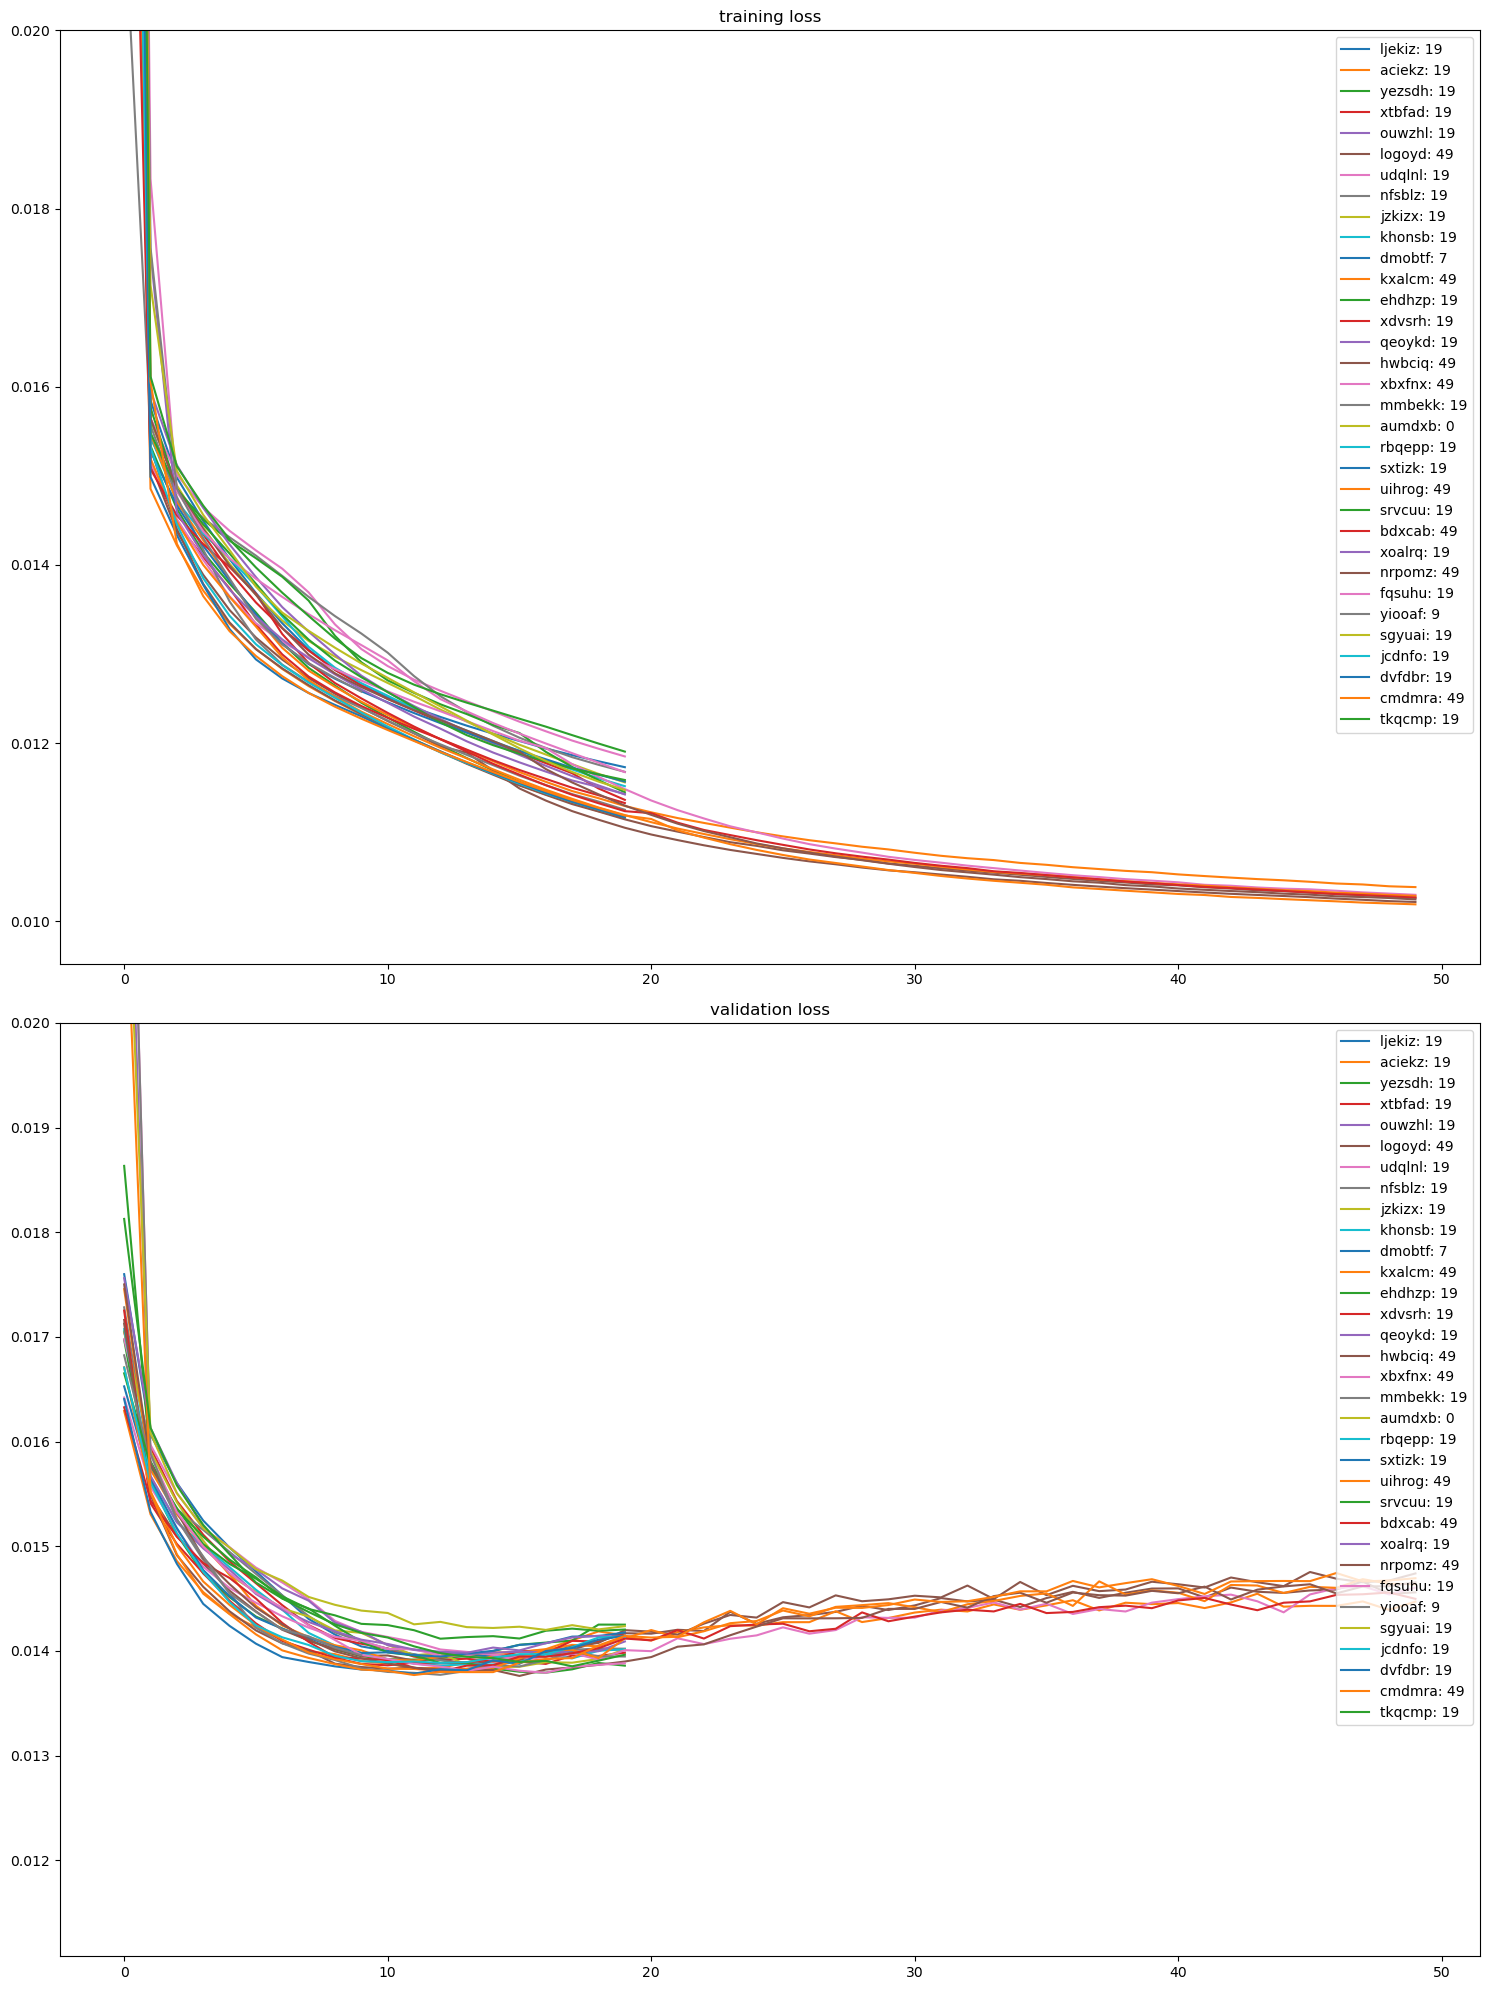

In [12]:
import sys
from typing import Set
import matplotlib.pyplot as plt
import matplotlib.axes as axes

sys.path.append("..")
from nnexp.utils import checkpoint_util
from nnexp.experiment import Experiment

def plot_one(exp: Experiment, axes: axes.Axes, field: str, label: str):
    if field == 'val_loss_hist':
        if len(exp.val_loss_hist):
            hist_x, hist_y = zip(*exp.val_loss_hist)
        else:
            hist_x, hist_y = list(), list()
    else:
        hist_val = getattr(exp, field, None)
        if hist_val is None:
            return
        hist_x = list(range(len(hist_val)))
        hist_y = hist_val

    if len(hist_y):
        # axes.set_ylim(ymin=min(hist_y), ymax=max(hist_y))
        axes.set_ylim(ymax=.02, ymin=(min(hist_y) * 0.8))
    axes.plot(hist_x, hist_y, label=label)
    axes.legend()

exps = checkpoint_util.list_experiments()
# exps = [exp for exp in exps if exp.shortcode == 'gdyfmh']
# exps = [exp for exp in exps if exp.shortcode in ['suhuab', 'edxhmm', 'idsdex']]
exps = [exp for exp in exps if exp.net_class == 'EmbedToLatent']

print(f"{len(exps)=}")
# exps = [exp for exp in exps
#         if exp.net_class == 'Unet'
#         # and exp.net_image_size == 256
#         and exp.image_size == 256
#         and exp.nepochs > 0]

if True:
    field_map = {
        'train_loss_hist': 'training loss',
        'val_loss_hist': 'validation loss',
        # 'backing_loss_hist': 'backing loss',
        # 'kld_loss_hist': 'kl/d loss'
    }

    nrows = len(field_map)
    fig = plt.figure(1, figsize=(15, 10 * nrows), layout='tight')
    axes_list = fig.subplots(nrows=nrows, ncols=1)

    for axes, (field, field_label) in zip(axes_list, field_map.items()):
        axes.set_title(field_label)
        for exp in exps:
            plot_one(exp, axes, field, f"{exp.shortcode}: {exp.nepochs}")

else:
    nrows = len(exps)
    fig = plt.figure(1, figsize=(15, 5 * nrows), layout='tight')
    axes_list = fig.subplots(nrows=nrows, ncols=1)
    if isinstance(axes_list, axes.Axes):
        axes_list = [axes_list]

    for exp, axes in zip(exps, axes_list):
        plot_one(exp, axes, 'train_loss_hist', 'training loss')
        plot_one(exp, axes, 'val_loss_hist', 'val loss')

        axes.set_title(f"{exp.shortcode}\nnepochs {exp.nepochs}\n{exp.label}", loc='left')

        for run in exp.runs:
            run_epochs = run.checkpoint_nepochs
            axes.axvline(run_epochs, color='black', linestyle='dotted', label='checkpoints')
            tloss = exp.train_loss_hist[run_epochs - 1]
            axes.annotate(f"{tloss:.5f}", xy=(run_epochs, tloss))


